# LAb5: Generalização de modelos lineares

<hr style="border:1px  solid black"> </hr>

### (Preencher)
## Nome: Fábio Dias
## Número: 42921

<hr style="border:1px  solid black"> </hr>

## Desenvolva e corra o código pedido nas células imediatamente abaixo das perguntas.

# IMPORTANTE:
## Uma vez completado, grave este Jupyter notebook com o seguinte nome:
## Axxxxx-Lab5.ipynb (Axxxxx: número de aluno)
##  e depois submeta o ficheiro no link do Moodle providenciado para o efeito.

<hr style="border:2px solid black"> </hr>

# Dados: $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$
### Considere os dados do $\texttt{breast_cancer}$ dataset do $\texttt{sklearn}$, divididos em três conjuntos, treino/validação/teste, segundo os comandos da próxima célula.
* ### X1a: dados de treino (array de $319\times30$)
* ### y1a: classe do dados de treino
* ### X1b: dados de validação (array de $100\times30$)
* ### y1b: classe do dados de validação
* ### X2: dados de treino (array de $150\times30$)
* ### y2: classe do dados de teste

In [50]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve
from sklearn.model_selection import  train_test_split
import sklearn.datasets as DT
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

D=DT.load_breast_cancer()
X=D.data
y=D.target

################################################################
#ATENÇÃO: Considerar os casos malígnos como positivos (classe 1)
#Necessário inverter classes
y=np.abs(y-1)
################################################################

#divitir em treino, validação e teste
X1,X2,y1,y2=train_test_split(X,y,test_size=150,stratify=y,random_state=42)
X1a,X1b,y1a,y1b=train_test_split(X1,y1,test_size=100,stratify=y1,random_state=42)

# Pergunta 1: Discriminantes logístico
##  Considere um discriminante logístico com regularização $\ell_1$ (lasso) e com os parâmetros $\texttt{C=2}$, $\texttt{solver='saga'}$ e $\texttt{max_iter=5000}$. Treine o classificador com os conjuntos de treino e validação (419 exemplos).
### a) Imprima o número total de erros e matriz de confusão (não normalizada) deste classificador para o conjunto de teste.
### b) Imprima o índice e os nomes (feature names) das dimensões dos dados que não interferem no processo de classificação (dimensões descartadas).
### c) Calibre este classificador de maneira a ter um número máximo de falsos negativos no teste inferior o igual a 5, e ao mesmo tempo mantendo o número total de erros igual à da alínea 1.a).
### d) Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional dos classificadores das alíneas 1.a) e 1.c).

## 1.a)

In [51]:
dl = LogisticRegression(penalty='l1', C=2, solver='saga', max_iter=5000)

dl.fit(X1, y1)
y2e = dl.predict(X2)

CM = confusion_matrix(y2, y2e)

print("Número de Erros: ", np.sum(y2 != y2e))
print(CM)

Número de Erros:  12
[[93  1]
 [11 45]]


## 1.b)

In [52]:
fN = D.feature_names

w = dl.coef_
w = w.squeeze()

print("Dimensões Descartadas: ", np.sum(w==0))
print(fN[w==0])
print(np.argwhere(w==0).squeeze())

Dimensões Descartadas:  11
['mean smoothness' 'mean fractal dimension' 'radius error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst smoothness' 'worst fractal dimension']
[ 4  9 10 14 15 16 17 18 19 24 29]


## 1.c)

In [53]:
y2d = dl.decision_function(X2)

CM_limiar = confusion_matrix(y2, y2d > - 1.53)

#Ter em conta que o que procuramos modificar é o índice (1, 0). As classes foram invertidas.
#Se diminuir o indice (1, 0), tenho de aumentar, no mesmo número, o índice (0, 1)
print(CM_limiar)

[[86  8]
 [ 4 52]]


## 1.d)

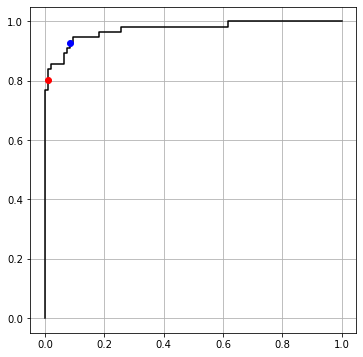

In [54]:
f, r, t = roc_curve(y2, y2d)

#Pontos Operacionais
f1 = CM[0, 1] / (CM[0, 0] + CM[0, 1])
r1 = CM[1, 1] / (CM[1, 0] + CM[1, 1])

f2 = CM_limiar[0, 1] / (CM_limiar[0, 0] + CM_limiar[0, 1])
r2 = CM_limiar[1, 1] / (CM_limiar[1, 0] + CM_limiar[1, 1])

plt.figure(figsize=(12, 6))
plt.plot(f, r, 'k-', f1, r1, 'or', f2, r2, 'ob')
plt.axis('scaled')
plt.grid(True)

<hr style="border:2px solid black"> </hr>

# Pergunta 2 - SVMs:
## Considere o classificador da função $\texttt{SVC}$ com os parâmetros $\texttt{kernel='rbf'}$ e $\texttt{C=2}$.
### a) Faça um pré-processamento dos dados usando a função $\texttt{StandardScaler}$. Treine esta função com os dados treino e aplique a transformação aos três conjuntos (treino, validação e teste). Use os dados pré-processados nas alíneas seguintes.
### b) Pertende-se estimar o valor do parâmetro $\texttt{gamma}$  ($\gamma$) mais adequado para este problema. Para tal, use o conjunto de validação para achar o valor de $\gamma$ que resulta no menor número de erros (treine o $\texttt{SVC}$ com o conjunto de treino). Teste os seguintes valores de $\gamma$: $[0.005 , 0.0075, 0.01  , 0.0125, 0.015 , 0.0175]$. Volte a treinar o classificador $\texttt{SVC}$ com os dados de treino e validação, e com o melhor valor de $\gamma$. Imprima o número total de erros e matriz de confusão (não normalizada) deste classificador para o conjunto de teste.
### c)  Calibre o classificador da alínea anterior de modo a obter zero (0) falsos negativos nos dados de teste. Após a calibração qual o número mínimo de falso positivos obtidos no teste?
### d) Faça um plot da curva ROC deste classificador com os dados de teste. Inclua nesse plot o ponto operacional dos classificadores das alíneas 1.b) e 1.c).

## 2.a)

In [55]:
sc = StandardScaler().fit(X1)

X1n = sc.transform(X1)
X1an = sc.transform(X1a)
X1bn = sc.transform(X1b)
X2n = sc.transform(X2)

## 2.b)

In [56]:
minErros = 1000
gList = [0.005, 0.0075, 0.01, 0.0125, 0.015, 0.0175]
betterG = 0

for g in gList:
    svm = SVC(kernel='rbf', C=2, gamma=g).fit(X1an, y1a)
    y1e = dl.predict(X1bn)
    erros = np.sum(y1e != y1b)
    if erros < minErros:
        minErros = erros
        betterG = g

print("Número de Erros na Validação: ", minErros)

svm = SVC(kernel='rbf', C=2, gamma=g).fit(X1n, y1)
y2e = svm.predict(X2n)

CM = confusion_matrix(y2, y2e)

print("Número de Erros no Teste: ", np.sum(y2 != y2e))
print(CM)

Número de Erros na Validação:  87
Número de Erros no Teste:  3
[[94  0]
 [ 3 53]]


## 2.c)

In [57]:
y2d = svm.decision_function(X2n)
CM_limiar = confusion_matrix(y2, y2d > -0.97)

print("Falsos Negativos: ", CM_limiar[1, 0])
print("Falsos Positivos: ", CM_limiar[0, 1])

Falsos Negativos:  0
Falsos Positivos:  12


## 2.d)

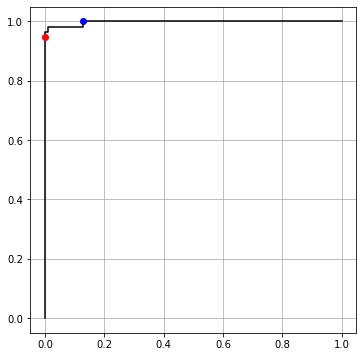

In [58]:
f, r, t = roc_curve(y2, y2d)

#Pontos Operacionais
f1 = CM[0, 1] / (CM[0, 0] + CM[0, 1])
r1 = CM[1, 1] / (CM[1, 0] + CM[1, 1])

f2 = CM_limiar[0, 1] / (CM_limiar[0, 0] + CM_limiar[0, 1])
r2 = CM_limiar[1, 1] / (CM_limiar[1, 0] + CM_limiar[1, 1])

plt.figure(figsize=(12, 6))
plt.plot(f, r, 'k-', f1, r1, 'or', f2, r2, 'ob')
plt.axis('scaled')
plt.grid(True)